## Cluster tracks based on their audio features

In [27]:
# imports

import pandas as pd
import csv
import numpy as np

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline





In [28]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [29]:
# read the audio features from the web api

url = 'http://csssmusic.com/tracks/features'
df = pd.read_csv(url, delimiter='\t')
df.head()

,spotify_track_id,track_name,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,5JN0dpZxu1EPljO8AyfcoV,Waves of Blue,Majid Jordan,56,0.00743,0.652,208747.0,0.861,0.000023,6.0,0.3370,-4.863,0.0,0.0565,99.983,0.3330
1,6krYS8KtmNAYyb5uTZiYW4,Dawn FM,The Weeknd,66,0.67400,0.280,96240.0,0.478,0.000058,9.0,0.4830,-8.755,0.0,0.0370,111.650,0.0807
2,1nH2PkJL1XoUq8oE6tBZoU,Sacrifice,The Weeknd,82,0.02960,0.735,188918.0,0.795,0.000032,11.0,0.0678,-6.523,0.0,0.1130,122.000,0.9050
3,2Ghp894n1laIf2w98VeAOJ,How Do I Make You Love Me?,The Weeknd,73,0.02030,0.805,214215.0,0.498,0.000024,7.0,0.0850,-7.927,0.0,0.0737,121.006,0.6360
4,69w5X6uTrOaWM32IetSzvO,Daydreaming,Harry Styles,88,0.31100,0.707,187342.0,0.811,0.015200,4.0,0.1310,-5.298,0.0,0.0304,113.971,0.8990


In [30]:
# remove the uneeded columns
df1 = df.drop(columns=['spotify_track_id', 'duration_ms', 'mode', 'key'])


In [31]:
# normalise the fields
fields_to_normalize = ['loudness', 'tempo']
for field in fields_to_normalize:
    df1[field]=(df1[field]-df1[field].min())/(df1[field].max()-df1[field].min())


### Basic visualisations

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>],
       [<AxesSubplot:title={'center':'valence'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

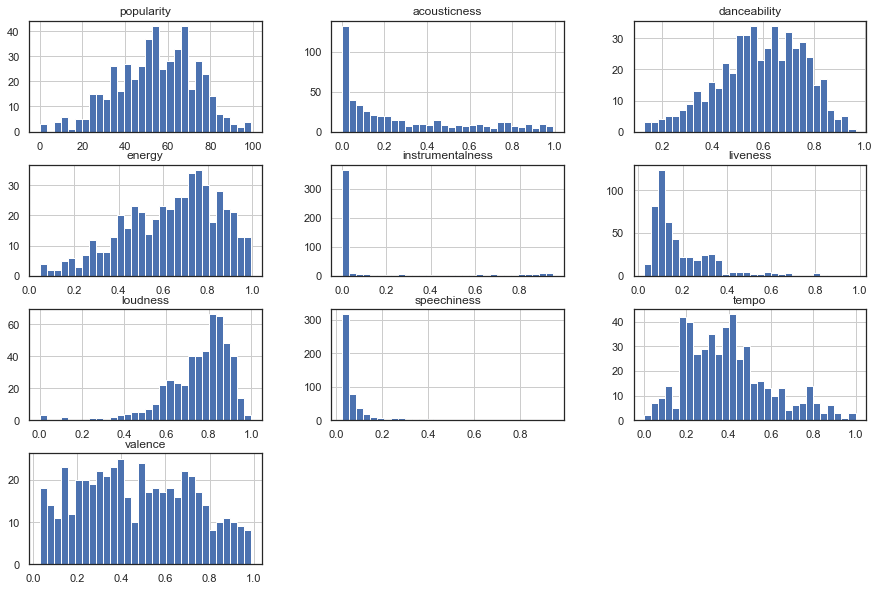

In [32]:
# histograms
df1.hist(bins=30, figsize=(15, 10))

In [51]:
# now cluster them
cluster_fields = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 
                  'loudness', 'speechiness', 'tempo', 'valence']

spotify_data = df1[cluster_fields].values
scaled_spotify_data = StandardScaler().fit_transform(spotify_data)

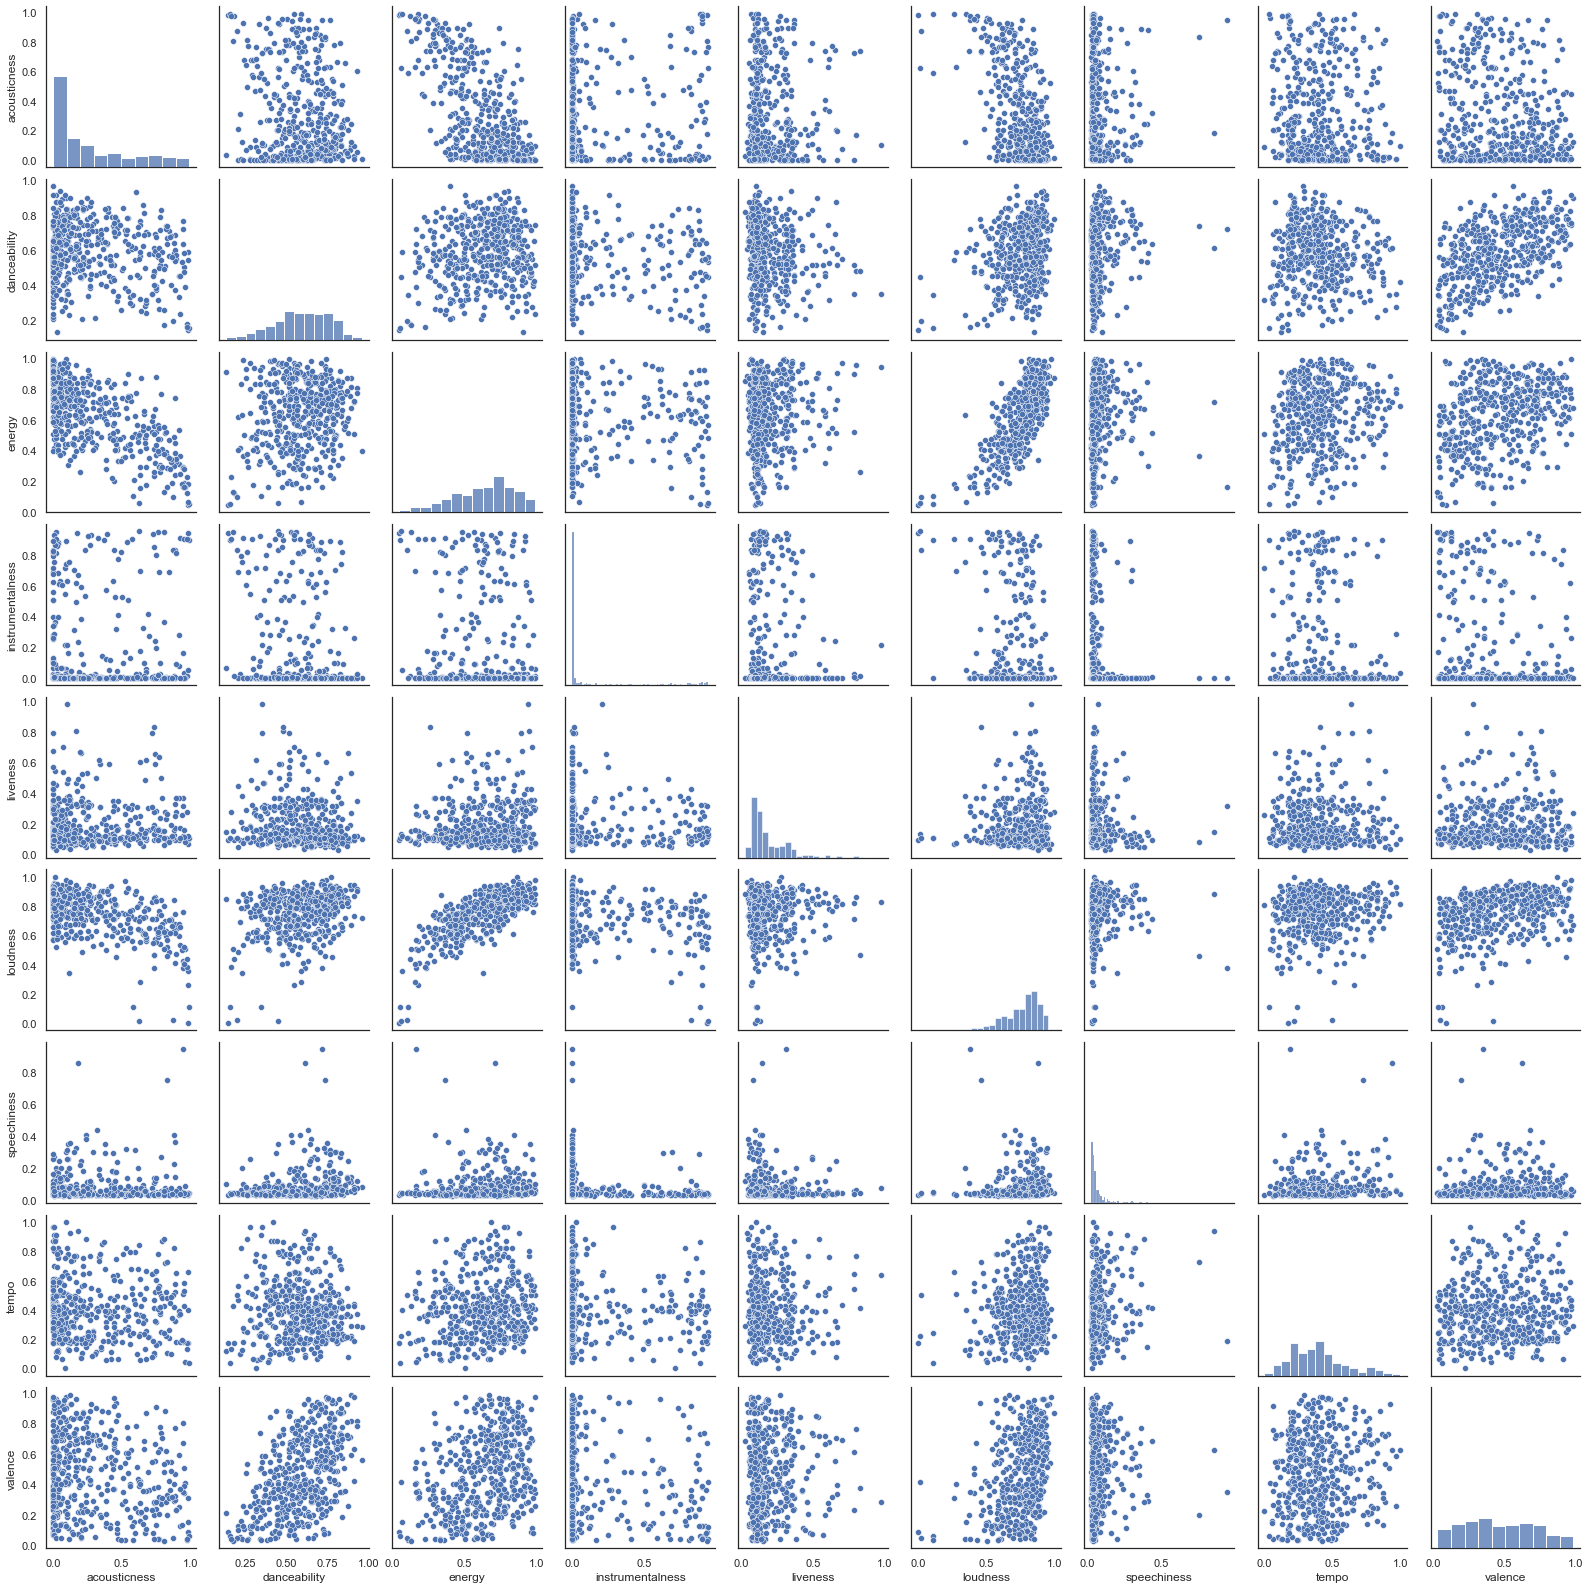

In [55]:
sns.pairplot(df1[cluster_fields])

In [56]:
import umap.umap_ as umap

In [57]:
reducer = umap.UMAP()


In [58]:
embedding = reducer.fit_transform(scaled_spotify_data)
embedding.shape

(494, 2)

Text(0.5, 1.0, 'UMAP projection of the Spotify tracks dataset')

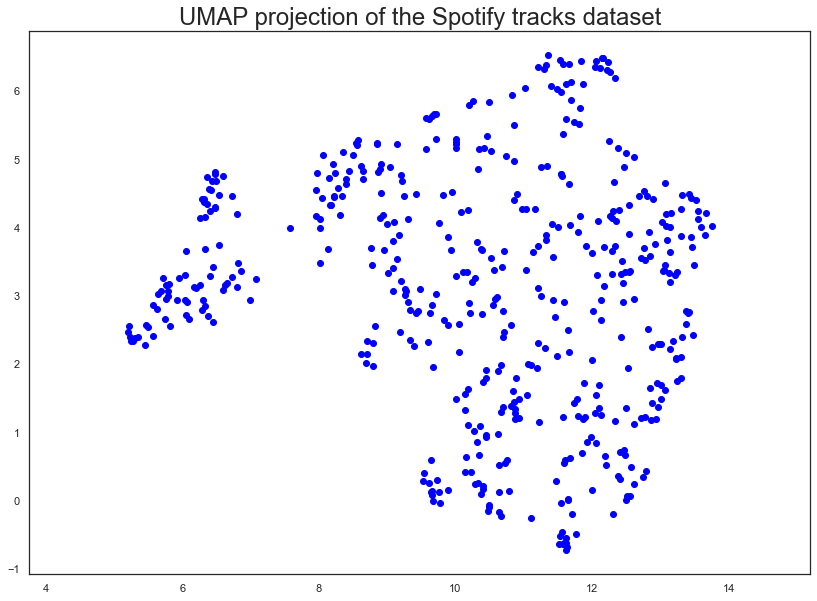

In [59]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c="blue")
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Spotify tracks dataset', fontsize=24)